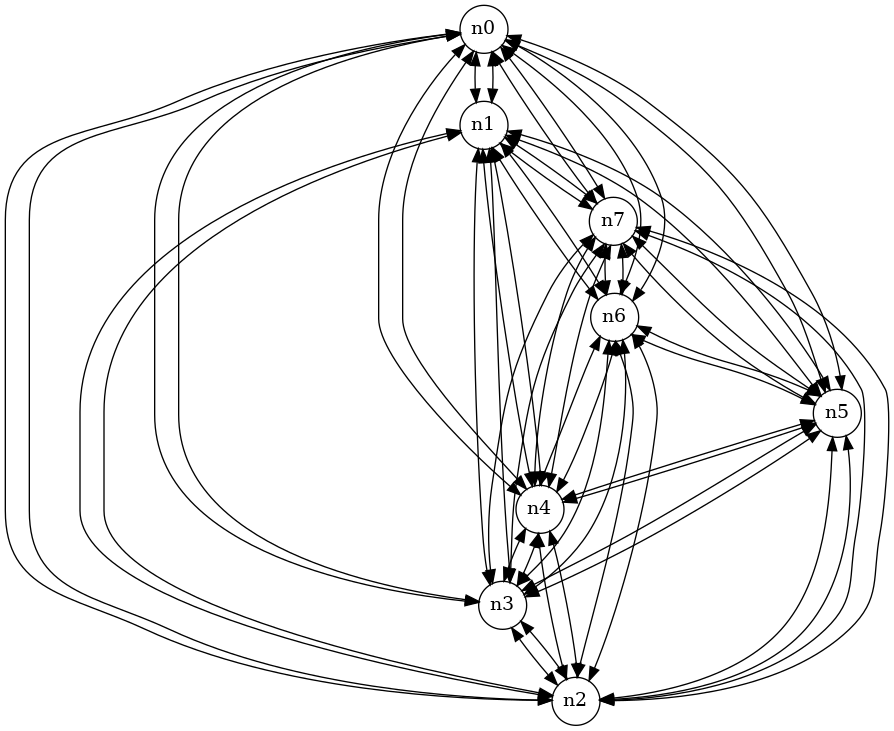

In [1]:
from graphviz import Graph
import math

nodes = 8
dot = Graph()

# Set the default node and edge attributes
dot.node_attr.update(shape='circle', fixedsize='true', width='0.5')
dot.edge_attr.update(dir='both')

# Define the positions of the nodes using polar coordinates
dot.node('n0', pos='0,0!')
dot.node('n1', pos='0.9239,0.3827!')
dot.node('n2', pos='0.9239,-0.382!')
dot.node('n3', pos='0.3827,-0.9239!')
dot.node('n4', pos='-0.3827,-0.9239!')
dot.node('n5', pos='-0.9239,-0.3827!')
dot.node('n6', pos='-0.9239,0.3827!')
dot.node('n7', pos='-0.3827,0.9239!')

# Create bidirectional edges between the nodes
for i in range(nodes):
    for j in range(nodes):
        if i != j:
            dot.edge("n"+str(i), "n"+str(j), dir='both')


dot.render('network_graph', format='png')


from IPython.display import Image

Image(filename='network_graph.png')

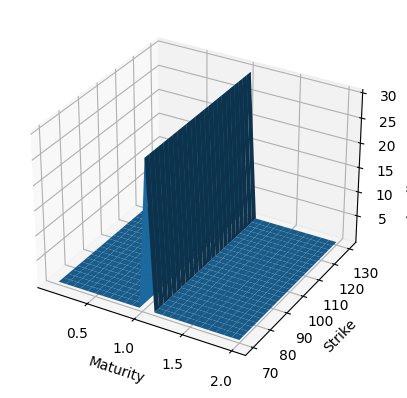

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def SABR_vol(alpha, beta, rho, nu, K, F, T):
    """Calculate the SABR volatility for a given set of parameters."""
    if abs(F - K) < 1e-10:
        # At-the-money (ATM) approximation
        return (F*(1 + (nu**2/24)*(alpha**2/(F**2)))**(0.5)*alpha)
    else:
        # Non-ATM case
        z = (nu/alpha)*(F*K)**((1 - beta)/2)*np.log(F/K)
        x = np.log((np.sqrt(1 - 2*rho*z + z**2) + z - rho)/(1 - rho))
        factor1 = alpha*(F*K)**((beta - 1)/2)
        factor2 = 1 + ((1 - beta)**2/24)*alpha**2*(F*K)**(1 - beta)
        return factor1*factor2*x/z

# Define the SABR parameters
alpha = 0.3
beta = 0.5
rho = -0.25
nu = 0.4

# Define the option strikes and maturities
strikes = np.linspace(70, 130, 25)
maturities = np.linspace(0.1, 2, 25)

# Calculate the implied volatilities for each combination of strike and maturity
implied_vols = np.zeros((len(strikes), len(maturities)))
for i in range(len(strikes)):
    for j in range(len(maturities)):
        K = strikes[i]
        T = maturities[j]
        F = 100
        implied_vols[i, j] = SABR_vol(alpha, beta, rho, nu, K, F, T)

# Plot the implied volatilities as a surface
X, Y = np.meshgrid(maturities, strikes)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, implied_vols.T)
ax.set_xlabel('Maturity')
ax.set_ylabel('Strike')
ax.set_zlabel('Implied Volatility')
plt.show()